
##**Prueba Simulación**
---
##**Estudiante:** Pedro Illaisaca
---
##**Carrera:** Computación


##Importamos las librerías para el procesado de datos##

In [1]:
# importar las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


##Importamos las librerías para presentar las gráficas

##Cargamos el dataset de Población
En este conjunto de datos encontramos las cifras de desempleo y empleo en el Ecuador desde el año 2007 hasta el presente 2021


In [2]:
#Trabajar con otro tipo de datos Fifa
#Previamente ralizar la conexion con drive!!!!11
pob = pd.read_csv("D:/UPS_DECIMO/SIMULACION/1.PoblacionesPedro.csv",skiprows=2, low_memory=False,encoding= 'latin1')
#imprimir los primeros 5 datos del archivo
#pob.head()
print(pob)

    Unnamed: 0  Unnamed: 1                           Unnamed: 2     Total  \
0       ENEMDU  12/01/2007                      Población Total  13682302   
1       ENEMDU  12/01/2007           Población menor de 15 años   4372812   
2       ENEMDU  12/01/2007  Población en Edad de Trabajar (PET)   9309490   
3       ENEMDU  12/01/2007      Población Económicamente Activa   6336029   
4       ENEMDU  12/01/2007                               Empleo   6019332   
..         ...         ...                                  ...       ...   
895    ENEMDU*  10/01/2021                    Desempleo Abierto    336101   
896    ENEMDU*  10/01/2021                     Desempleo Oculto     48103   
897    ENEMDU*  10/01/2021                    Desempleo Cesante    298846   
898    ENEMDU*  10/01/2021                      Desempleo Nuevo     85358   
899    ENEMDU*  10/01/2021    Población Económicamente Inactiva   4330241   

      Urbana    Rural   Hombre    Mujer  
0    9066209  4616093  6768646  6

##FIltración de datos
Al analizar los datos podemos darnos cuenta que existe una columna con el total de la población empleo y desempleo, de modo que porcedos a filtrar las filas que contienen esa etiqueta


In [3]:
empleo=pob.loc[ (pob['Unnamed: 2']) == 'Empleo']
desempleo=pob.loc[ (pob['Unnamed: 2']) == 'Desempleo']#(pob['Unnamed: 2'] == 'Empleo')
#newData.head()
#empleo.head()


##Funciones
Para una mejor optimizacion del Codigo vamos a realizar una función que extrae solamente el año y lo adiciona en una nueva columna del dataframe


In [4]:
def extractYear(anio):
  return str(anio).split("/")[2]

empleo["Anios"]=empleo.apply(lambda x: extractYear(x[1]), axis=1)
desempleo["Anios"]=desempleo.apply(lambda x: extractYear(x[1]), axis=1)

desempleo.head()


<ipython-input-4-2a9d3d56c681>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empleo["Anios"]=empleo.apply(lambda x: extractYear(x[1]), axis=1)
<ipython-input-4-2a9d3d56c681>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desempleo["Anios"]=desempleo.apply(lambda x: extractYear(x[1]), axis=1)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Total,Urbana,Rural,Hombre,Mujer,Anios
12,ENEMDU,12/01/2007,Desempleo,316697,256662,60036,144918,171780,2007
30,ENEMDU,06/01/2008,Desempleo,344143,282489,61654,151283,192860,2008
48,ENEMDU,12/01/2008,Desempleo,380026,317011,63015,165296,214730,2008
66,ENEMDU,12/01/2009,Desempleo,423802,347068,76734,201625,222177,2009
84,ENEMDU,06/01/2010,Desempleo,408318,338652,69666,194691,213628,2010


Procedemos a extraer los años en donde se registraron estas cifras

In [5]:
colum_anios_empleo=empleo.iloc[:,-1]
colum_anios_empleo=colum_anios_empleo.unique()
print(colum_anios_empleo)

['2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2018' '2019' '2020' '2021']


##Funcion
Programamos una función que nos permite hacer  una búsqueda en los registros del dataset y posteriormente sería llamada desde una función lambda

In [6]:

def search_value_desemp(param,key,val):
  if param==key:
    return val    

##Búsqueda
Procedemos ha realizar la búsqueda en función de todos los años, tanto en el dataframe de empleo y del de desempleo de paso procedemos a realizar un promedio en base a los datos porque existen cifras por cada mes reduciendo la información a intervalos por año


In [7]:
##Creacion de diccionarios y busqueda de datos
list_vals_emp_anio=[]
list_vals_desemp_anio=[]
dic_empleo={}
dic_desempleo={}

for i in colum_anios_empleo:
  dfT=empleo.apply(lambda x:search_value_desemp(i,x[8],x[3]),axis=1)
  dfT=dfT.dropna()
  dic_empleo.setdefault(i,dfT.mean())

for i in colum_anios_empleo:
  dfT=desempleo.apply(lambda x:search_value_desemp(i,x[8],x[3]),axis=1)
  dfT=dfT.dropna()
  dic_desempleo.setdefault(i,dfT.mean())

print(dic_empleo)  
print(dic_desempleo)  


{'2007': 6019332.0, '2008': 6125310.0, '2009': 6125135.0, '2010': 6143685.5, '2011': 6264709.0, '2012': 6506555.5, '2013': 6695018.0, '2014': 6784413.75, '2015': 7151139.25, '2016': 7482333.75, '2017': 7766294.0, '2018': 7778951.0, '2019': 7853174.75, '2020': 7673343.25, '2021': 7917790.1}
{'2007': 316697.0, '2008': 362084.5, '2009': 423802.0, '2010': 365672.5, '2011': 302996.0, '2012': 279372.5, '2013': 281348.0, '2014': 304555.0, '2015': 324618.0, '2016': 423871.75, '2017': 358466.5, '2018': 330265.75, '2019': 365105.75, '2020': 456457.5, '2021': 431402.7}


##Dataframe final 
Como en la sección anterior se obtuvieron diccionarios que contenían los años y los valores por cada año ahora simplemente los juntamos en un solo dataset.


In [8]:
empleo=pd.DataFrame(dic_empleo.items())
empleo.columns=['Años','Empleo']

desempleo=pd.DataFrame(dic_desempleo.items())
desempleo.columns=['Años','Desempleo']

empleo["Desempleo"]=desempleo.iloc[:,-1]
empleo.head()

,Años,Empleo,Desempleo
0,2007,6019332.0,316697.0
1,2008,6125310.0,362084.5
2,2009,6125135.0,423802.0
3,2010,6143685.5,365672.5
4,2011,6264709.0,302996.0


##Graficamos los resultados del Desempleo

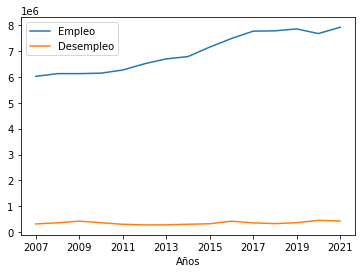

In [9]:
fig, ax = plt.subplots()
empleo.plot(x = 'Años', y = 'Empleo', ax = ax)
empleo.plot(x = 'Años', y = 'Desempleo', ax = ax)
plt.show()

##Generar gráfica tipo PIE según la sectorización de empleo en función de años
Procedemos a cargar el dataset y preprocesados haciendo un transpose a los datos para un mejor manejo para que se mapean los datos de mejor manera procedemos a guardarlos 


In [10]:
#!ls drive/MyDrive/DataPrueba
secto= pd.read_csv("D:/UPS_DECIMO/SIMULACION/Sectoriza.csv",skiprows=0, low_memory=False,encoding= 'latin1')
secto=secto.iloc[0:5]
secto=secto.transpose()
secto.columns=secto.iloc[1]
secto=secto.iloc[2:]
secto.head()
secto.to_csv('D:/UPS_DECIMO/SIMULACION/asdk.csv',encoding= 'latin1')

In [11]:
secto= pd.read_csv("D:/UPS_DECIMO/SIMULACION/asdk.csv",skiprows=0, low_memory=False,encoding= 'latin1')
secto.head()

,Unnamed: 0,Unnamed: 1,Sector Formal,Sector Informal,Empleo Doméstico,No Clasificados por Sector
0,Unnamed: 2,06/01/2007,-,-,-,-
1,Unnamed: 3,09/01/2007,-,-,-,-
2,Unnamed: 4,12/01/2007,41%,45.1%,3.3%,10.6%
3,Unnamed: 5,03/01/2008,-,-,-,-
4,Unnamed: 6,06/01/2008,42.5%,45.4%,3.3%,8.8%


##Funciones
Para una mejor optimizacion del Codigo vamos a realizar una función que extrae solamente el año y lo adiciona en una nueva columna del dataframe

Procedemos a extraer los años en donde se registraron estas cifras


In [12]:
secto["Anios"]=secto.apply(lambda x: extractYear(x[1]), axis=1)
secto.head()

,Unnamed: 0,Unnamed: 1,Sector Formal,Sector Informal,Empleo Doméstico,No Clasificados por Sector,Anios
0,Unnamed: 2,06/01/2007,-,-,-,-,2007
1,Unnamed: 3,09/01/2007,-,-,-,-,2007
2,Unnamed: 4,12/01/2007,41%,45.1%,3.3%,10.6%,2007
3,Unnamed: 5,03/01/2008,-,-,-,-,2008
4,Unnamed: 6,06/01/2008,42.5%,45.4%,3.3%,8.8%,2008


##Funcion
Programamos una función que nos permite hacer  una búsqueda en los registros del dataset y posteriormente sería llamada desde una función lambda

In [13]:
def search_value_sec(param,key,secF,secIn,empD,noClass):
  if param==key:
    return float(secF.strip('%')),float(secIn.strip('%')),float(empD.strip('%')),float(noClass.strip('%')),key  


##Funcion
Esta función se encarga de recibir un rango de años para luego obtener un reporte de cifras y consiguiente la graficación de los datos finalmente retorna un dataset con la informacion requerida


In [14]:
def sectorizacion(rang1,rang2):
  dfF=pd.DataFrame()
  for i in range(rang1,rang2):
    dfT=secto.apply(lambda x: search_value_sec(str(i),x[6],x[2],x[3],x[4],x[5]),axis=1)
    dfT=dfT.dropna()
    dfT=dfT.to_frame()
    dfT.columns=['one']
    dfT=pd.DataFrame(dfT['one'].values.tolist())
    dfT.columns=['Sector Formal'	,'Sector Informal'	,'Empleo Doméstico',	'No Clasificados por Sector',	'Anios']
    dfTMean=dfT.describe().iloc[1:2]
    dfTMean['Anios']=i
    dfF=pd.concat([dfF,dfTMean],axis=0)
    #dfF=pd.concat([dfF,dfT],axis=0)


    #dfT=pd.DataFrame(,columns=['Sector Formal'	,'Sector Informal'	,'Empleo Doméstico',	'No Clasificados por Sector'])
    
    
    #dfF=pd.concat([dfF,dfT])
  dfF=dfF.transpose()  
  dfF.columns=dfF.iloc[-1]
  dfF=dfF.iloc[:-1]
  dfF.to_csv('D:/UPS_DECIMO/SIMULACION/graficasPie.csv',encoding= 'latin1')
  dfF= pd.read_csv("D:/UPS_DECIMO/SIMULACION/graficasPie.csv",skiprows=0, low_memory=False,encoding= 'latin1')
  dfF.set_index('Unnamed: 0',inplace = True)
  
  return dfF


##Funcion 
Nos permite graficar los pie en función de los mismos rangos ingresados en la función anterior


In [15]:
def graficar(dataF,rang1,rang2):
  for i in range(rang1,rang2):
    dataF.plot.pie(y=str(i)+".0", figsize=(5, 5))


##Información

In [16]:
#2017 2022
rango1=''
rango2=''


In [17]:
# Parameters
rango1 = "2017"
rango2 = "2022"


In [18]:
rango1=int(rango1)
rango2=int(rango2)

,2017.0,2018.0,2019.0,2020.0,2021.0
Unnamed: 0,,,,,
Sector Formal,47.800,46.825,45.700,41.525,41.44
Sector Informal,45.275,46.225,46.600,52.250,51.03
Empleo Doméstico,2.700,2.700,2.750,2.000,2.06
No Clasificados por Sector,4.175,4.275,4.975,4.225,5.49


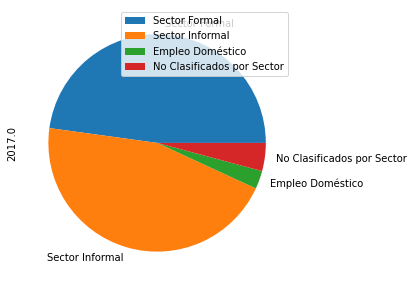

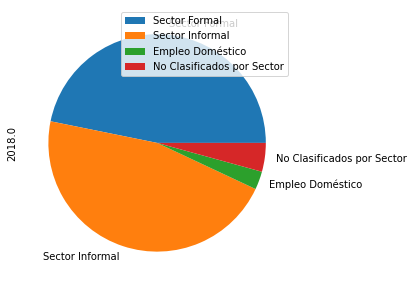

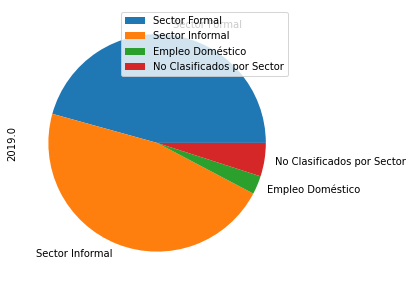

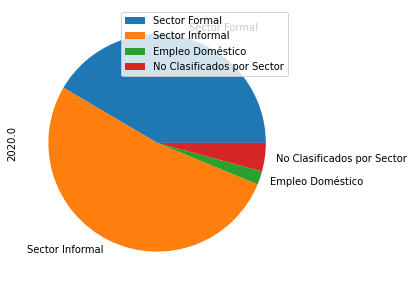

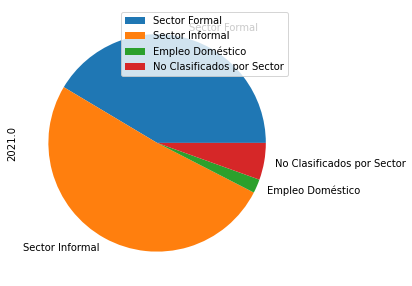

In [19]:
dataSecto=sectorizacion(rango1,rango2)
graficar(dataSecto,rango1,rango2)
dataSecto.head()

##Generar histogramas subempleo, empleo pleno y empleo no pleno por año
Procedemos a extraer la información necesaria para resolver el enunciado, dicha información está disponible en el dataset de población 

In [20]:
subempleo=pob.loc[ (pob['Unnamed: 2']) == 'Subempleo']
pleno=pob.loc[ (pob['Unnamed: 2']) == 'Empleo Adecuado/Pleno']#Empleo Adecuado/Pleno, Otro Empleo no pleno
no_pleno=pob.loc[ (pob['Unnamed: 2']) == 'Otro Empleo no pleno']

##Funciones
Para una mejor optimizacion del Codigo vamos a realizar una función que extrae solamente el año y lo adiciona en una nueva columna del dataframe

Procedemos a extraer los años en donde se registraron estas cifras


In [21]:
subempleo["Anios"]=subempleo.apply(lambda x: extractYear(x[1]), axis=1)
pleno["Anios"]=pleno.apply(lambda x: extractYear(x[1]), axis=1)
no_pleno["Anios"]=no_pleno.apply(lambda x: extractYear(x[1]), axis=1)

<ipython-input-21-0df9a81e57ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subempleo["Anios"]=subempleo.apply(lambda x: extractYear(x[1]), axis=1)
<ipython-input-21-0df9a81e57ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pleno["Anios"]=pleno.apply(lambda x: extractYear(x[1]), axis=1)
<ipython-input-21-0df9a81e57ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Procedemos a concatenar toda la información en un solo dataframe

In [22]:
dataF_Gegeral=pd.concat([subempleo,pleno,no_pleno],axis=0)
dataF_Gegeral=dataF_Gegeral.iloc[:,[2,3,8]]
dataF_Gegeral.columns=['Tipo','Total','Anios']
dataF_Gegeral.head()

,Tipo,Total,Anios
6,Subempleo,1155872,2007
24,Subempleo,1130699,2008
42,Subempleo,957978,2008
60,Subempleo,1071615,2009
78,Subempleo,1041266,2010



##Búsqueda
Procedemos ha realizar la búsqueda en función de todos los años y un palabra clave que  en este caso sería Subempleo  empleo pleno y no pleno tanto en el dataframe de empleo



In [23]:
def search_value(param_anio,param_tipo,key_anio,key_tipo,total):
  if param_anio==key_anio and param_tipo== key_tipo:
    return param_tipo,total,param_anio

##Funcion 
Esta función general nos permite obtener el data frame que buscamos en función del rango de años y una palabra clave, nos debe retornar la información requerida


In [24]:
def procesado_sub_pleno_noPleno_empleo(rang1,rang2,tipo):
    dfF=pd.DataFrame(columns=['Tipo','Total','Anios'])
    #tipo='Subempleo'
    for i in range(rang1,rang2):
        dfT=dataF_Gegeral.apply(lambda x: search_value(str(i),tipo,x[2],x[0],x[1]),axis=1)
        dfT=dfT.dropna()
        dfT=dfT.to_frame()
        dfT.columns=['one']
        dfT=pd.DataFrame(dfT['one'].values.tolist())
        dfT.columns=['Tipo','Total','Anios']
        dfF=pd.concat([dfF,dfT],axis=0)
        #print(dfT)
        #break

    dfF[['Total']]=dfF[['Total']].astype(int)
    #dfF.head()
    return dfF.groupby(['Anios'])['Total'].agg([np.average]) 

##Llamada a Funciones y Graficar

In [25]:
def graficarH(data):
  data.plot(kind="bar", figsize=(16,4))

In [26]:
df_sub=procesado_sub_pleno_noPleno_empleo(rango1,rango2,"Subempleo")
df_pleno=procesado_sub_pleno_noPleno_empleo(rango1,rango2,"Empleo Adecuado/Pleno")
df_no_pleno=procesado_sub_pleno_noPleno_empleo(rango1,rango2,"Otro Empleo no pleno")

,subempleo,pleno,no_pleno
Anios,,,
2017,1669343.50,3275341.00,1986290.00
2018,1493030.00,3249694.50,2162808.00
2019,1570431.25,3148216.75,2207743.50
2020,1978116.75,2395943.75,2253043.75
2021,1933593.10,2646380.10,2265989.90


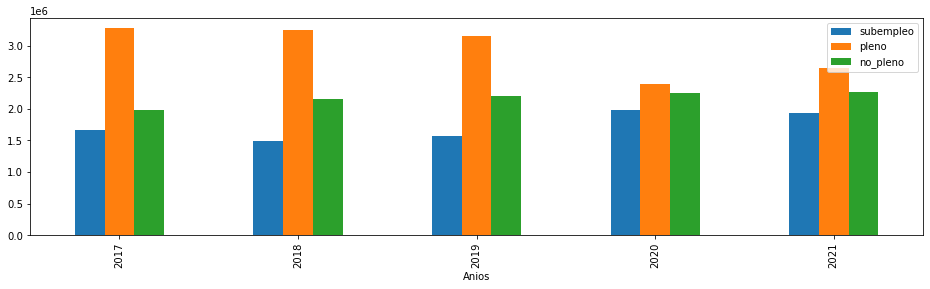

In [27]:
df_histo=df_sub
df_histo['pleno']=df_pleno.iloc[:,-1]
df_histo['no_pleno']=df_no_pleno.iloc[:,-1]
df_histo.rename(columns={'average':'subempleo'},inplace=True)
graficarH(df_histo)
df_histo.head()

##Concluciones
*   Los estudiantes refuerzan conocimientos y práctica en el procesamiento y análisis de datos 

*   En cuanto a las cifras de empleo y desempleo podemos concluir que a lo largo de los años el nivel ha ido en aumento con una considerable diferencia entre las cifras analizadas.

*   Del mismo caso en el análisis realizado la sectorización del empleo, subempleo, empleo pleno y empleo no pleno podemos evidenciar que existe una diferencia poco perceptible en función a los años que se ingresa como parametro


##Recomendación
Para cargar los datos proporcionados por el docente  es necesario realizar un paso adicional el cual consiste el transformar el .csv a formato excel y posterior mente transformarlo a formato .csv nuevamente, hecho estos pasos no tendremos problemas al momento de cargar los datos de entrada

